In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GITHUB/pytorch_basic/pytorch
from mult_class_functions_1 import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GITHUB/pytorch_basic/pytorch


In [3]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [4]:
BATCH_SIZE = 32
LR = 1e-3
EPOCH = 5
new_model_Train = True
save_model_path = "/content/drive/MyDrive/Colab notebooks/data/results/MLP_MNIST.pt"

In [5]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab notebooks/data', train = True, download = True, transform = transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab notebooks/data', train = False, download = True, transform = transform)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle = True)

In [7]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcs = nn.Sequential(nn.Linear(28*28,30),
                                 nn.ReLU(), #  nn.Sigmoid(),
                                 nn.Linear(30,10))
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.fcs(x)
        return x




In [8]:
 model = MLP().to(DEVICE)



Epoch: 1, train loss: 0.401
--------------------
Epoch: 2, train loss: 0.231
--------------------
Epoch: 3, train loss: 0.178
--------------------
Epoch: 4, train loss: 0.145
--------------------
Epoch: 5, train loss: 0.124
--------------------


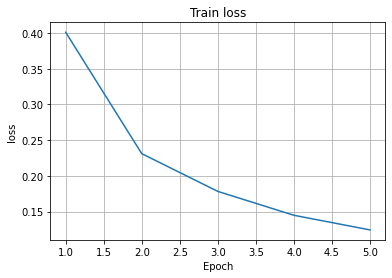

In [ ]:
if new_model_Train:
    loss_history = Train(model, train_DL, LR = LR, EPOCH = EPOCH)
    torch.save(model, save_model_path)
    plt.plot(range(1, EPOCH+1), loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.title("Train loss")
    plt.grid()

In [ ]:
load_model = torch.load(save_model_path, map_location=DEVICE)

Test accuracy: 9634/10000 (96.3 %)
23860


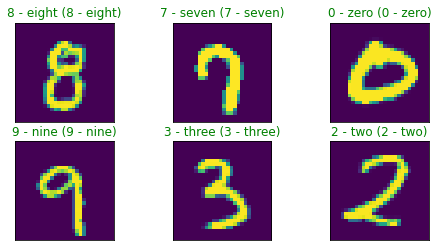

In [ ]:
Test(load_model,test_DL)
count_params(load_model)
Test_plot(load_model, test_DL)